In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Estimate age Nan, Remove cabin column (due to nan), Remove embarked Nan rows
# Remove Name, Ticket no

In [12]:
train_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

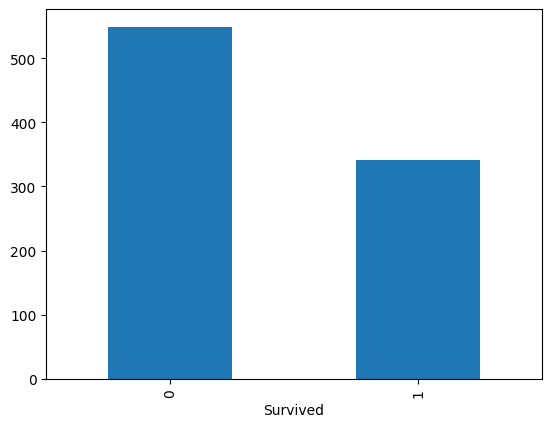

In [11]:
train_df["Survived"].value_counts().plot(kind="bar")

<Axes: xlabel='Pclass'>

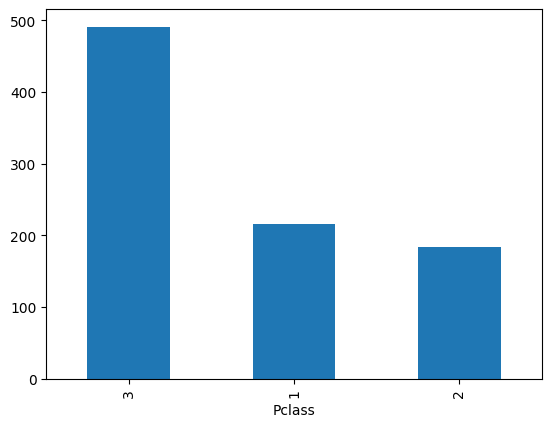

In [14]:
train_df["Pclass"].value_counts().plot(kind="bar")

In [15]:
pd.crosstab(train_df["Survived"], train_df["Pclass"])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [26]:
pd.crosstab(train_df["Survived"], train_df["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [27]:
pd.crosstab(train_df["Survived"], train_df["Embarked"])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [23]:
num_attr = ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]

In [22]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(train_df[cols], figsize=(20,20));

In [25]:
corr_mat = train_df[num_attr].corr()
corr_mat["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

In [28]:
train_df["Age"].mean(), train_df["Age"].median()

(29.69911764705882, 28.0)

In [31]:
clean_train_df = train_df.dropna(axis=0, subset=["Embarked"])
clean_train_df = clean_train_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

In [55]:
clean_train_df.info() #Missing age values will be handled by SimpleImputer

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [33]:
X_train = clean_train_df.drop(columns=["Survived"])
num_attr.remove("Survived")
y_train = clean_train_df["Survived"]

In [34]:
cat_attr = [attr for attr in X_train.columns if attr not in num_attr]
num_attr, cat_attr

(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], ['Sex', 'Embarked'])

In [36]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attr),
    ("cat", OneHotEncoder(), cat_attr)
])

full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat', OneHotEncoder(), ['Sex', 'Embarked'])])

In [37]:
X_train_prep = full_pipeline.fit_transform(X_train)

In [45]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train_prep, y_train)

SGDClassifier()

In [46]:
from sklearn.metrics import accuracy_score

sgd_pred = sgd_clf.predict(X_train_prep)
sgd_acc = accuracy_score(y_train, sgd_pred)
sgd_acc

0.7986501687289089

In [47]:
from sklearn.model_selection import cross_val_score

sgd_cv_scores = cross_val_score(
    sgd_clf,
    X_train_prep,
    y_train,
    cv=9
)

In [48]:
sgd_cv_scores

array([0.76767677, 0.6969697 , 0.67676768, 0.80808081, 0.77777778,
       0.74747475, 0.77777778, 0.76530612, 0.71428571])

In [49]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

confusion_matrix(y_train, sgd_pred)

array([[482,  67],
       [112, 228]], dtype=int64)

In [50]:
precision_score(y_train, sgd_pred), recall_score(y_train, sgd_pred)

(0.7728813559322034, 0.6705882352941176)

In [51]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_prep, y_train)

DecisionTreeClassifier()

In [52]:
tree_pred = tree_clf.predict(X_train_prep)
tree_acc = accuracy_score(y_train, tree_pred)
tree_acc

0.9797525309336333

In [53]:
tree_cv_scores = cross_val_score(
    tree_clf,
    X_train_prep,
    y_train,
    cv=9
)

tree_cv_scores

array([0.73737374, 0.74747475, 0.77777778, 0.7979798 , 0.83838384,
       0.74747475, 0.77777778, 0.7755102 , 0.86734694])

In [56]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(X_train_prep, y_train)

RandomForestClassifier()

In [57]:
forest_pred = forest_clf.predict(X_train_prep)
forest_acc = accuracy_score(y_train, forest_pred)
forest_acc

0.9786276715410573

In [58]:
forest_cv_scores = cross_val_score(
    forest_clf,
    X_train_prep,
    y_train,
    cv=9
)

forest_cv_scores

array([0.7979798 , 0.77777778, 0.7979798 , 0.86868687, 0.85858586,
       0.77777778, 0.73737374, 0.82653061, 0.84693878])

In [59]:
sgd_cv_scores.mean(), tree_cv_scores.mean(), forest_cv_scores.mean()

(0.7480130099177719, 0.7852332852332853, 0.809959000435191)

In [ ]:
#Try using Grid Search